In [1]:
#import dependencies 
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [5]:
#create dictionary to store 
rows = []
#scrape for table rows
for row in browser.find_by_css('tr'):
    rows.append(row.text.split(' '))

In [6]:
#quit browser
browser.quit()

In [13]:
#reading the scrap into a dataframe
scraped_data = pd.DataFrame(rows)
scraped_data.head()
#set column names
scraped_data.columns = scraped_data[:1].values[0]
scraped_data.head()
#remove first row & start index at 0
scraped_data = scraped_data.drop([0])
scraped_data = scraped_data.reset_index()
scraped_data.head()

,index,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1,2,2012-08-16,10,155,6,-75.0,739.0
1,2,13,2012-08-17,11,156,6,-76.0,740.0
2,3,24,2012-08-18,12,156,6,-76.0,741.0
3,4,35,2012-08-19,13,157,6,-74.0,732.0
4,5,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
#convert dtypes to appropriate dytpes for analysis
scraped_data['terrestrial_date'] = pd.to_datetime(scraped_data['terrestrial_date'])
scraped_data[['id', 'sol', 'ls', 'month']] = scraped_data[['id', 'sol', 'ls', 'month']].astype(int)
scraped_data[['min_temp', 'pressure']]= scraped_data[['min_temp', 'pressure']].astype(float)
scraped_data.dtypes
scraped_data['month'].unique()
print('Twelve months exist on Mars.')

Twelve months exist on Mars.


In [19]:
scraped_data['sol'].count()
print('1867 Martian days exist in the dataset.')

1867 Martian days exist in the dataset.


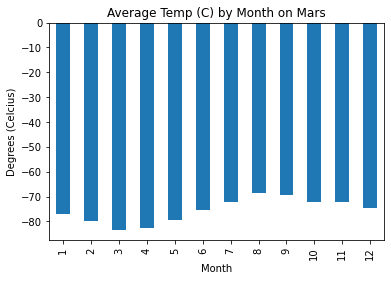

Months 3 and 4 were the coldest.


In [27]:
#group by month 
scrapeddata_bymonth = scraped_data.groupby(['month'])
#find mean 
#find the average temp
avg_temp = scrapeddata_bymonth["min_temp"].mean()
#plot
avg_temp.plot(kind="bar")
plt.ylabel("Degrees (Celcius)")
plt.xlabel("Month")
plt.title("Average Temp (C) by Month on Mars")
plt.show()
print('Months 3 and 4 were the coldest.')

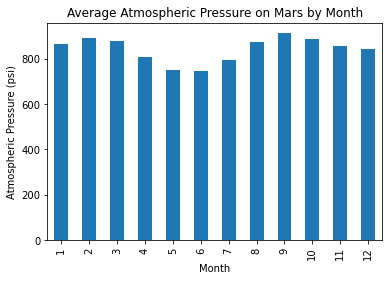

Months 5 and 6 have the lowest atmospheric pressure. Months 9 and 10 have the highest atmospheric pressure.


In [28]:
#find mean pressure & plot
avg_press = scrapeddata_bymonth["pressure"].mean()
avg_press.plot(kind="bar")
plt.ylabel("Atmospheric Pressure (psi)")
plt.xlabel("Month")
plt.title("Average Atmospheric Pressure on Mars by Month")
plt.show()
print('Months 5 and 6 have the lowest atmospheric pressure. Months 9 and 10 have the highest atmospheric pressure.')

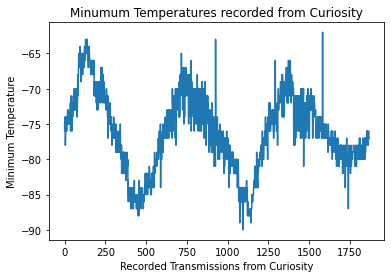

Temperatures will be the highest when Mars is closest to the sun, which could represent that point in one year. To estimate one year, we could subtract the amount of days between two of the highest temperatures. 750-150=600 days passed on Earth.


In [30]:
#plot daily min temp
scraped_data["min_temp"].plot()
plt.ylabel("Minimum Temperature")
plt.xlabel("Recorded Transmissions from Curiosity")
plt.title("Minumum Temperatures recorded from Curiosity")
plt.show()

print('Temperatures will be the highest when Mars is closest to the sun, which could represent that point in one year. To estimate one year, we could subtract the amount of days between two of the highest temperatures. 750-150=600 days passed on Earth.')

In [31]:
#export to csv file
os.makedirs("output", exist_ok=True) 
scraped_data.to_csv("output/scraped_data.csv", index=False)